# Titanic Data Analysis Project

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import pickle
import streamlit as st
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [64]:
dataset=pd.read_csv('C:/Users/umari/OneDrive/Desktop/FSDS DATASETs/titanic_ dataset_final.csv')

In [65]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
dataset.shape

(891, 12)

In [68]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

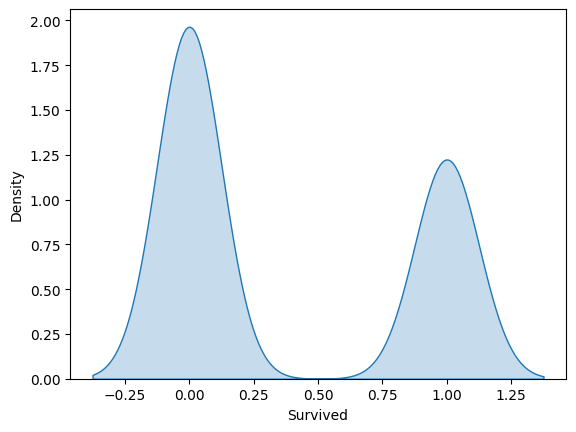

In [69]:
sns.kdeplot(dataset['Survived'],fill=True)
mean = dataset['Survived'].mean()
plt.show()

# Outliers

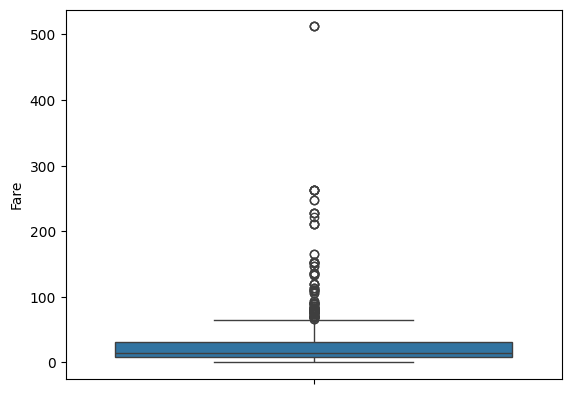

In [70]:
sns.boxplot(dataset['Fare'])
plt.show()

In [71]:
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3-Q1
IQR

17.875

In [72]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [73]:
outliers = dataset[(dataset['Age']<lower_limit)|(dataset['Age']>upper_limit)]
outliers.shape

(11, 12)

# Removing Outliers

In [74]:
dataset_clean = dataset[(dataset['Survived']>=lower_limit) & (dataset['Survived']<=upper_limit)]

In [75]:
dataset_clean.shape

(891, 12)

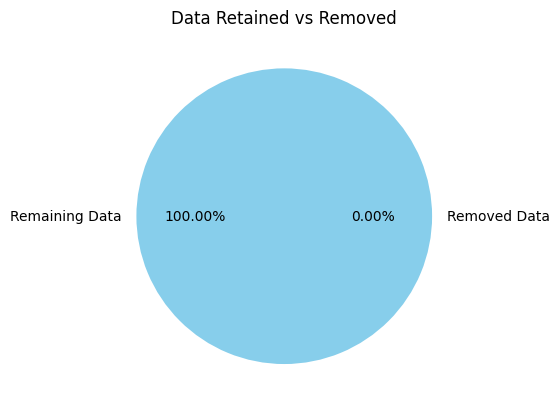

In [76]:
# Calculate counts
removed = len(dataset) - len(dataset_clean)
remaining = len(dataset_clean)

# Pie chart
plt.pie(
    [remaining, removed],
    labels=["Remaining Data", "Removed Data"],
    autopct="%.2f%%",
    colors=["skyblue", "lightcoral"]
)
plt.title("Data Retained vs Removed")
plt.show()

In [77]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
cat_col = dataset.select_dtypes(include='object').columns.tolist()

In [80]:
binary_col = [col for col in cat_col if dataset[col].nunique()==2]

In [81]:
binary_col

['Sex']

In [82]:
#checking if any value is missing
print(dataset.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


# Missing Values Treatment

In [83]:
# Fill numeric columns with mean
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

# Fill categorical columns with most frequent value (mode)
dataset['Cabin'].fillna(dataset['Cabin'].mode()[0], inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [84]:
print(dataset.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool


In [85]:
#checking for categorical data
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [86]:
print(dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


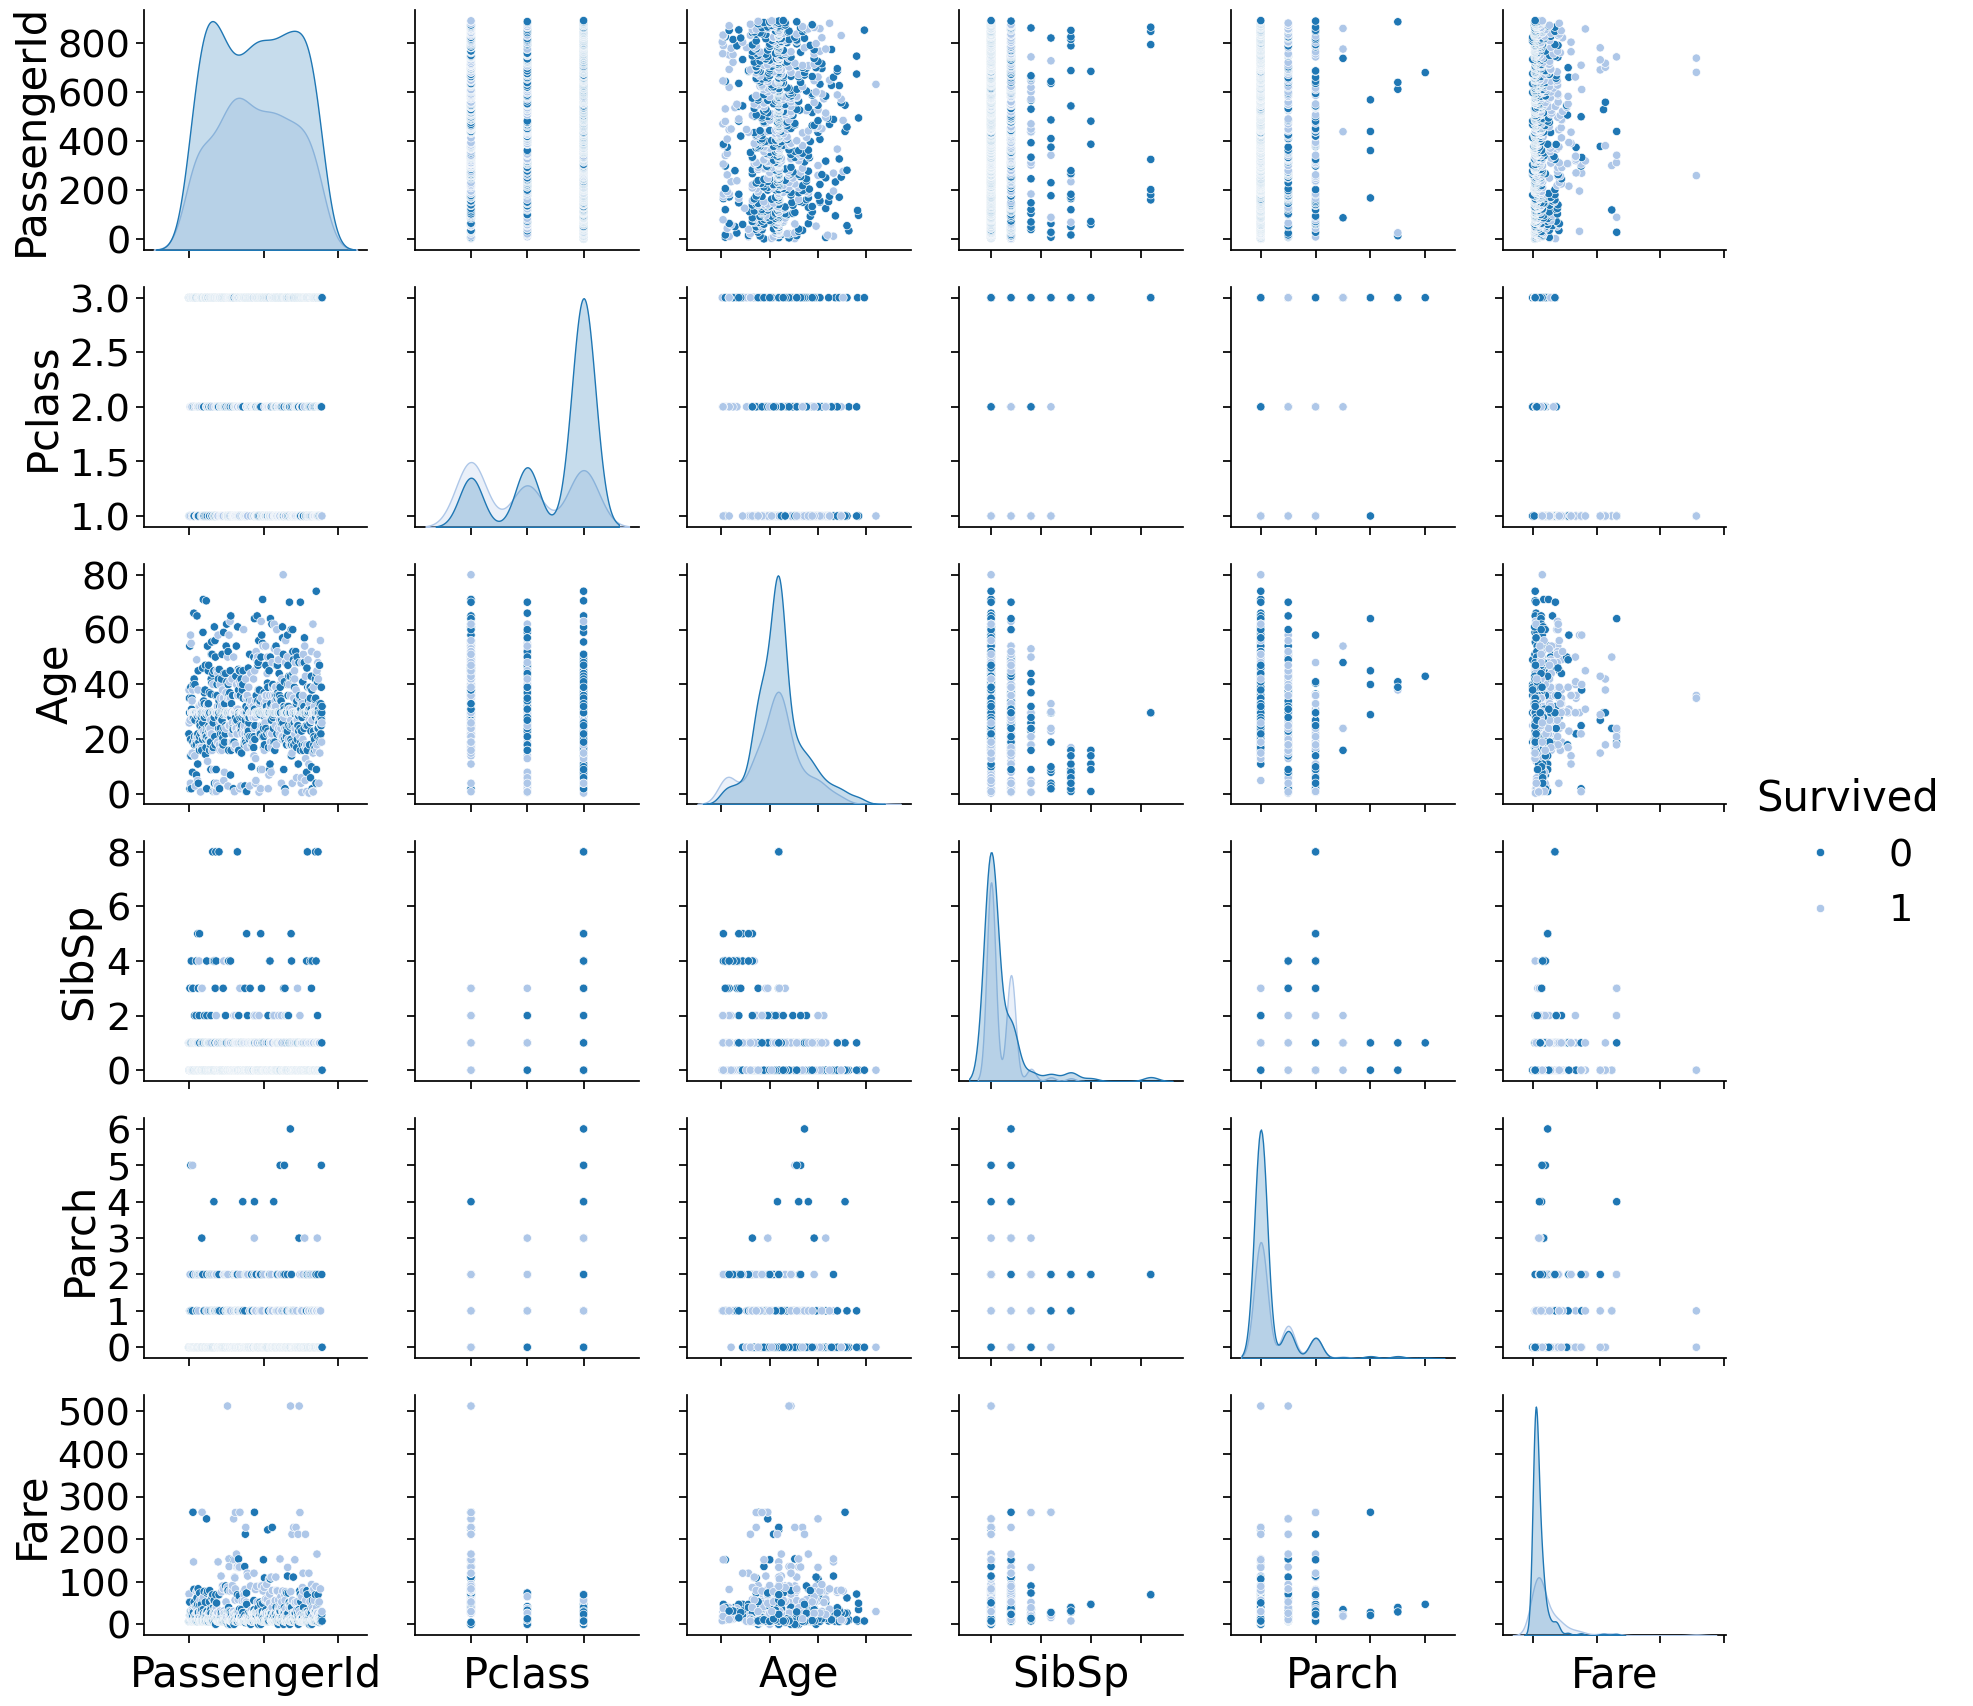

In [87]:
with sns.plotting_context("notebook", font_scale=2.5):
    g = sns.pairplot(
        dataset[['PassengerId','Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Ticket','Cabin']],
        hue='Survived',
        palette='tab20',
        height=3
    )
    g.set(xticklabels=[])

In [88]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Encoding

In [89]:
le = LabelEncoder()
for col in binary_col:
    dataset[col] = le.fit_transform(dataset[col])

In [90]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [91]:
cat_col = [col for col in cat_col if col in dataset.columns]

In [92]:
mult_col = [col for col in cat_col if dataset[col].nunique()>2]
mult_col

['Name', 'Ticket', 'Cabin', 'Embarked']

In [93]:
dataset = pd.get_dummies(dataset,columns=mult_col,drop_first=True)

In [94]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,False,...,False,False,False,False,False,False,False,False,False,True


In [95]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,1,0,7.2500,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,0,38.000000,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,0,26.000000,0,0,7.9250,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,0,35.000000,1,0,53.1000,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,1,35.000000,0,0,8.0500,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,False,False,...,False,False,False,False,False,False,False,False,False,True
887,888,1,1,0,19.000000,0,0,30.0000,False,False,...,False,False,False,False,False,False,False,False,False,True
888,889,0,3,0,29.699118,1,2,23.4500,False,False,...,False,False,False,False,False,False,False,False,False,True
889,890,1,1,1,26.000000,0,0,30.0000,False,False,...,False,False,False,False,False,False,False,False,False,False


# Splitting the Data

In [96]:
X = dataset.drop(columns=['Survived'])
y = dataset['Survived']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
331,332,1,1,45.5,0,0,28.5000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
733,734,2,1,23.0,0,0,13.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
382,383,3,1,32.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
704,705,3,1,26.0,1,0,7.8542,False,False,False,...,False,False,False,False,False,False,False,False,False,True
813,814,3,0,6.0,4,2,31.2750,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# Model Training

In [99]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Model Predcition

In [100]:
y_pred = lr.predict(X_test)

In [101]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
r2 = r2_score(y_test,y_pred)

In [102]:
mse,rmse,r2

(0.11993472900980877, 0.34631593814002953, 0.5054274578888954)

In [103]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       ...
       'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38',
       'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1726)

# To Improve R2

In [104]:
 #Log transform
dataset['log_Age'] = np.log1p(dataset['Age'])
dataset['log_Fare'] = np.log1p(dataset['Fare'])

In [105]:
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,log_Age,log_Fare
0,1,0,3,1,22.000000,1,0,7.2500,False,False,...,False,False,False,False,False,False,False,True,3.135494,2.110213
1,2,1,1,0,38.000000,1,0,71.2833,False,False,...,False,False,False,False,False,False,False,False,3.663562,4.280593
2,3,1,3,0,26.000000,0,0,7.9250,False,False,...,False,False,False,False,False,False,False,True,3.295837,2.188856
3,4,1,1,0,35.000000,1,0,53.1000,False,False,...,False,False,False,False,False,False,False,True,3.583519,3.990834
4,5,0,3,1,35.000000,0,0,8.0500,False,False,...,False,False,False,False,False,False,False,True,3.583519,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,False,False,...,False,False,False,False,False,False,False,True,3.332205,2.639057
887,888,1,1,0,19.000000,0,0,30.0000,False,False,...,False,False,False,False,False,False,False,True,2.995732,3.433987
888,889,0,3,0,29.699118,1,2,23.4500,False,False,...,False,False,False,False,False,False,False,True,3.424234,3.196630
889,890,1,1,1,26.000000,0,0,30.0000,False,False,...,False,False,False,False,False,False,False,False,3.295837,3.433987


In [106]:
X = dataset.drop(columns=['Survived'])
y = dataset['Survived']

In [107]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,log_Age,log_Fare
0,1,3,1,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,True,3.135494,2.110213
1,2,1,0,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,3.663562,4.280593
2,3,3,0,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,True,3.295837,2.188856
3,4,1,0,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,True,3.583519,3.990834
4,5,3,1,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,True,3.583519,2.202765


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [110]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
r2 = r2_score(y_test,y_pred)
mse,rmse,r2

(0.12197357119847083, 0.3492471491629829, 0.49701992345299817)

In [111]:
filename='lr_model.pkl'

In [112]:
# Save model
with open("filename", "wb") as f:
    pickle.dump(lr, f)

In [113]:
# --- CONFIGURATION ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

DATA_FILE = "C:/Users/umari/OneDrive/Desktop/FSDS DATASETs/titanic_ dataset_final.csv"  # Update path if needed
MODEL_OUTPUT_FILE = "lr_model.pkl"
# ---------------------

# 1. Load the dataset
try:
    df = pd.read_csv(DATA_FILE)
except FileNotFoundError:
    print(f"Error: The file '{DATA_FILE}' was not found. Please check the path.")
    exit()

# 2. Select features and target
FEATURE_COLUMNS = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
TARGET_COLUMN = 'Survived'

# Ensure all columns exist
if not all(col in df.columns for col in FEATURE_COLUMNS + [TARGET_COLUMN]):
    missing = [col for col in FEATURE_COLUMNS + [TARGET_COLUMN] if col not in df.columns]
    print(f"Error: Missing columns in the dataset: {missing}")
    exit()

df_subset = df[FEATURE_COLUMNS + [TARGET_COLUMN]].copy()

# 3. Handle missing values
df_subset['Age'].fillna(df_subset['Age'].mean(), inplace=True)
df_subset['Embarked'].fillna(df_subset['Embarked'].mode()[0], inplace=True)

# --- ✅ Log Transformations (to reduce skewness) ---
df_subset['log_Age'] = np.log1p(df_subset['Age'])
df_subset['log_Fare'] = np.log1p(df_subset['Fare'])

# Replace original columns with transformed ones
df_subset.drop(columns=['Age', 'Fare'], inplace=True)

# 4. Convert categorical columns to numeric (one-hot encoding)
df_subset = pd.get_dummies(df_subset, drop_first=True)

# 5. Define X and y
X = df_subset.drop(columns=[TARGET_COLUMN])
y = df_subset[TARGET_COLUMN]

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 8. Display results
print(f"✅ Model trained successfully on {regressor.n_features_in_} features.")
print(f"Training R² Score: {regressor.score(X_train, y_train):.4f}")
print(f"Testing R² Score: {regressor.score(X_test, y_test):.4f}")

# 9. Save the trained model
with open(MODEL_OUTPUT_FILE, 'wb') as file:
    pickle.dump(regressor, file)

print(f"\n💾 SUCCESS: Model saved as '{MODEL_OUTPUT_FILE}'.")
print("You can now use it in your Streamlit app!")

✅ Model trained successfully on 8 features.
Training R² Score: 0.4010
Testing R² Score: 0.4523

💾 SUCCESS: Model saved as 'lr_model.pkl'.
You can now use it in your Streamlit app!
